## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Read-in data from prepared dataset

In [2]:
df = pd.read_csv("spy.csv")
df

,Date,Open,High,Low,Close,Adj Close,Volume,VIX Close,MACDs_12_26_9,RSI_14,HOUSTNSA,UNRATENSA,NA000334Q,FEDFUNDS
0,1993-03-18,45.218750,45.500000,45.218750,45.312500,25.812656,59300,14.170000,0.341036,57.813462,95.5,7.4,1638139.0,3.07
1,1993-03-19,45.281250,45.281250,45.031250,45.031250,25.773586,66900,13.230000,0.327421,52.897133,95.5,7.4,1638139.0,3.07
2,1993-03-22,44.593750,44.875000,44.562500,44.781250,25.630501,183400,13.660000,0.306865,48.915251,95.5,7.4,1638139.0,3.07
3,1993-03-23,44.906250,44.937500,44.812500,44.875000,25.684151,55200,13.020000,0.283831,50.422405,95.5,7.4,1638139.0,3.07
4,1993-03-24,44.812500,45.062500,44.593750,44.875000,25.684151,37200,12.440000,0.259806,50.422405,95.5,7.4,1638139.0,3.07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7560,2023-03-27,398.119995,398.920013,395.559998,396.489990,395.022644,74010400,20.600000,-2.166462,50.237958,113.6,3.6,6475560.0,4.65
7561,2023-03-28,395.769989,396.489990,393.690002,395.600006,394.135956,62871700,19.969999,-2.011635,49.308792,113.6,3.6,6475560.0,4.65
7562,2023-03-29,399.929993,401.600006,398.679993,401.350006,399.864655,77497900,19.120001,-1.761706,55.088303,113.6,3.6,6475560.0,4.65
7563,2023-03-30,404.089996,404.350006,401.760010,403.700012,402.205963,69840000,19.020000,-1.423762,57.234351,113.6,3.6,6475560.0,4.65


<AxesSubplot:>

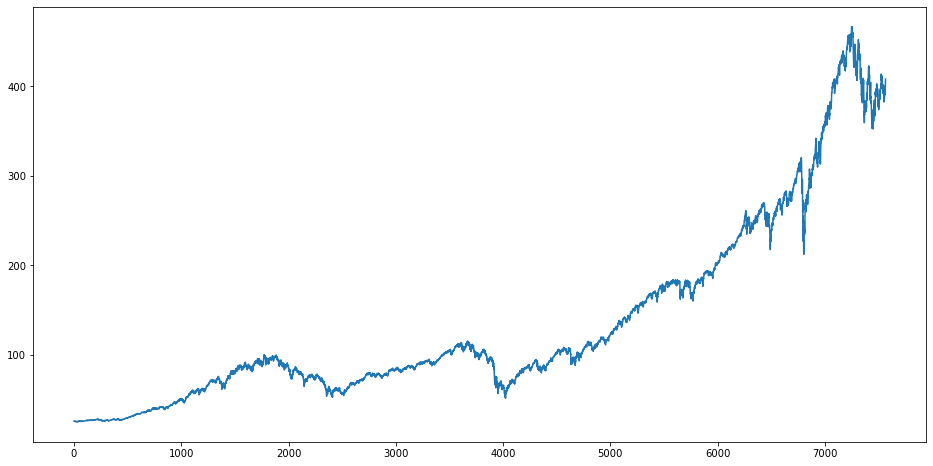

In [3]:
# short visualization of target
plt.subplots(figsize=(16,8))
df['Adj Close'].plot()

## Feature Selection & Target Labeling

#### In the machine learning process, feature selection is used to make the process more accurate. It also increases the prediction power of the algorithms by selecting the most critical variables and eliminating the redundant and irrelevant ones.

In [4]:
#Set Target Variable
output_var = pd.DataFrame(df['Adj Close'])
#Selecting the Features
features = ['Open', 'High', 'Low', 'Volume', 'VIX Close', 'MACDs_12_26_9',
            'RSI_14', 'HOUSTNSA', 'UNRATENSA', 'NA000334Q', 'FEDFUNDS']

## Scaling the Data

#### Feature scaling is the process of normalising the range of features in a dataset. Real-world datasets often contain features that are varying in degrees of magnitude, range and units. Therefore, in order for machine learning models to interpret these features on the same scale, we need to perform feature scaling.

In [5]:
#MinmaxScaling (feature_range=(0,1))
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
feature_transform = scaler.fit_transform(df[features])
feature_transform= pd.DataFrame(columns=features, data=feature_transform, index=df.index)
feature_transform

,Open,High,Low,Volume,VIX Close,MACDs_12_26_9,RSI_14,HOUSTNSA,UNRATENSA,NA000334Q,FEDFUNDS
0,0.004302,0.003726,0.004477,0.000062,0.068389,0.718958,0.584566,0.383133,0.369369,0.000000,0.465331
1,0.004445,0.003225,0.004044,0.000071,0.055608,0.718474,0.514663,0.383133,0.369369,0.000000,0.465331
2,0.002868,0.002293,0.002961,0.000205,0.061455,0.717744,0.458046,0.383133,0.369369,0.000000,0.465331
3,0.003585,0.002436,0.003538,0.000057,0.052753,0.716926,0.479475,0.383133,0.369369,0.000000,0.465331
4,0.003370,0.002723,0.003033,0.000037,0.044867,0.716072,0.479475,0.383133,0.369369,0.000000,0.465331
...,...,...,...,...,...,...,...,...,...,...,...
7560,0.813938,0.814127,0.813993,0.084964,0.155812,0.629867,0.476853,0.492169,0.027027,0.964229,0.708783
7561,0.808547,0.808555,0.809672,0.072176,0.147247,0.635368,0.463641,0.492169,0.027027,0.964229,0.708783
7562,0.818091,0.820273,0.821202,0.088968,0.135690,0.644248,0.545818,0.492169,0.027027,0.964229,0.708783
7563,0.827635,0.826578,0.828319,0.080176,0.134330,0.656255,0.576332,0.492169,0.027027,0.964229,0.708783


## Train, Test split

#### The train-test split procedure is used to estimate the performance of machine learning algorithms when they are used to make predictions on data not used to train the model. Splitting your dataset is essential for an unbiased evaluation of prediction performance.

In [6]:
#Splitting to Training set and Test set
from sklearn.model_selection import TimeSeriesSplit

timesplit= TimeSeriesSplit(n_splits=5)
for train_index, test_index in timesplit.split(feature_transform):
        X_train, X_test = feature_transform[:len(train_index)], feature_transform[len(train_index): (len(train_index)+len(test_index))]
        y_train, y_test = output_var[:len(train_index)].values.ravel(), output_var[len(train_index): (len(train_index)+len(test_index))].values.ravel()

# approximately~ 83%-17% split

## Prepare the data for LSTM input

#### Long short-term memory (LSTM) is an artificial neural network used in the fields of artificial intelligence and deep learning. Unlike standard feedforward neural networks, LSTM has feedback connections. <br> Such a recurrent neural network (RNN) can process not only single data points (such as images), but also entire sequences of data (such as speech or video). This characteristic makes LSTM networks ideal for processing and predicting data.

In [7]:
#Process the data for LSTM
trainX =np.array(X_train)
testX =np.array(X_test)
X_train = trainX.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = testX.reshape(X_test.shape[0], 1, X_test.shape[1])

## Model Building

In [8]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

#Define network
lstm = Sequential()
lstm.add(LSTM(32, input_shape=(1, trainX.shape[1]), activation='relu', return_sequences=False))
lstm.add(Dense(1))

#Compile network
lstm.compile(loss='mean_squared_error', optimizer='adam',
            metrics=[keras.metrics.MeanAbsoluteError(),keras.losses.MeanAbsolutePercentageError(),
                                                                keras.metrics.RootMeanSquaredError()])

## Model Training

In [9]:
#Training the LSTM Model
history=lstm.fit(X_train, y_train, epochs=100, batch_size=8, verbose=1, shuffle=False)

Epoch 1/100
789/789 [==============================] - 2s 1ms/step - loss: 3102.7688 - mean_absolute_error: 52.9818 - mean_absolute_percentage_error: 64.6135 - root_mean_squared_error: 55.7025
Epoch 2/100
789/789 [==============================] - 1s 1ms/step - loss: 1064.0256 - mean_absolute_error: 24.8742 - mean_absolute_percentage_error: 44.1013 - root_mean_squared_error: 32.6194
Epoch 3/100
789/789 [==============================] - 1s 1ms/step - loss: 592.5248 - mean_absolute_error: 18.3332 - mean_absolute_percentage_error: 33.8337 - root_mean_squared_error: 24.3418
Epoch 4/100
789/789 [==============================] - 1s 1ms/step - loss: 196.9220 - mean_absolute_error: 10.8620 - mean_absolute_percentage_error: 18.4571 - root_mean_squared_error: 14.0329
Epoch 5/100
789/789 [==============================] - 1s 1ms/step - loss: 63.9738 - mean_absolute_error: 6.1577 - mean_absolute_percentage_error: 8.0347 - root_mean_squared_error: 7.9984
Epoch 6/100
789/789 [=====================

789/789 [==============================] - 1s 1ms/step - loss: 2.6284 - mean_absolute_error: 1.2230 - mean_absolute_percentage_error: 1.5233 - root_mean_squared_error: 1.6212
Epoch 45/100
789/789 [==============================] - 1s 1ms/step - loss: 2.5837 - mean_absolute_error: 1.2094 - mean_absolute_percentage_error: 1.5012 - root_mean_squared_error: 1.6074
Epoch 46/100
789/789 [==============================] - 1s 1ms/step - loss: 2.5412 - mean_absolute_error: 1.1963 - mean_absolute_percentage_error: 1.4801 - root_mean_squared_error: 1.5941
Epoch 47/100
789/789 [==============================] - 1s 1ms/step - loss: 2.5007 - mean_absolute_error: 1.1837 - mean_absolute_percentage_error: 1.4595 - root_mean_squared_error: 1.5813
Epoch 48/100
789/789 [==============================] - 1s 1ms/step - loss: 2.4618 - mean_absolute_error: 1.1715 - mean_absolute_percentage_error: 1.4394 - root_mean_squared_error: 1.5690
Epoch 49/100
789/789 [==============================] - 1s 1ms/step - los

789/789 [==============================] - 1s 1ms/step - loss: 1.6297 - mean_absolute_error: 0.8635 - mean_absolute_percentage_error: 0.9060 - root_mean_squared_error: 1.2766
Epoch 88/100
789/789 [==============================] - 1s 1ms/step - loss: 1.6227 - mean_absolute_error: 0.8605 - mean_absolute_percentage_error: 0.9009 - root_mean_squared_error: 1.2739
Epoch 89/100
789/789 [==============================] - 1s 1ms/step - loss: 1.6161 - mean_absolute_error: 0.8577 - mean_absolute_percentage_error: 0.8961 - root_mean_squared_error: 1.2713
Epoch 90/100
789/789 [==============================] - 1s 1ms/step - loss: 1.6099 - mean_absolute_error: 0.8551 - mean_absolute_percentage_error: 0.8915 - root_mean_squared_error: 1.2688
Epoch 91/100
789/789 [==============================] - 1s 1ms/step - loss: 1.6044 - mean_absolute_error: 0.8527 - mean_absolute_percentage_error: 0.8871 - root_mean_squared_error: 1.2666
Epoch 92/100
789/789 [==============================] - 1s 1ms/step - los

## Model Evaluation

In [10]:
#Evaluation metrics: 1) Mean Square Error 2) Mean Absolute Error 
#                    3) Mean Absolute Percentage Error 4) Root Mean Square Error
lstm.evaluate(X_train, y_train, batch_size=8, verbose=1)

789/789 [==============================] - 1s 972us/step - loss: 5.4405 - mean_absolute_error: 1.6673 - mean_absolute_percentage_error: 1.7348 - root_mean_squared_error: 2.3325


[5.440496921539307, 1.667348861694336, 1.734784483909607, 2.3324873447418213]

#### The Mean Squared Error measures how close a regression line is to a set of data points. It is a risk function corresponding to the expected value of the squared error loss. <br> Mean square error is calculated by taking the average, specifically the mean, of errors squared from data as it relates to a function.
#### RMSE is the square root of MSE. <br> MSE is measured in units that are the square of the target variable, while RMSE is measured in the same units as the target variable. Due to its formulation, MSE, just like the squared loss function that it derives from, effectively penalizes larger errors more severely.

#### Mean Absolute Error (MAE) is a measure of the average size of the mistakes in a collection of predictions, without taking their direction into account. <br> It is measured as the average absolute difference between the predicted values and the actual values and is used to assess the effectiveness of a regression model.
#### Mean Absolute Percentage Error (MAPE) is the mean of all absolute percentage errors between the predicted and actual values. <br> It is a popular metric to use as it returns the error as a percentage, making it both easy for end users to understand and simple to compare model accuracy across use cases and datasets.

## Model Prediction

In [11]:
#LSTM Model Prediction
y_pred= lstm.predict(X_test)

40/40 [==============================] - 0s 1ms/step


In [12]:
# prediction output
y_pred

array([[234.12233],
       [232.4192 ],
       [232.71811],
       ...,
       [388.89844],
       [392.53427],
       [397.1061 ]], dtype=float32)

## Visualizing the results

In [13]:
y_train_df = df.iloc[:len(X_train)]['Adj Close']
y_test_df = df.iloc[len(X_train):]['Adj Close']
y_pred_df = pd.DataFrame(data=y_pred, columns=['Adj Close'],index=np.arange(len(X_train),len(df)))

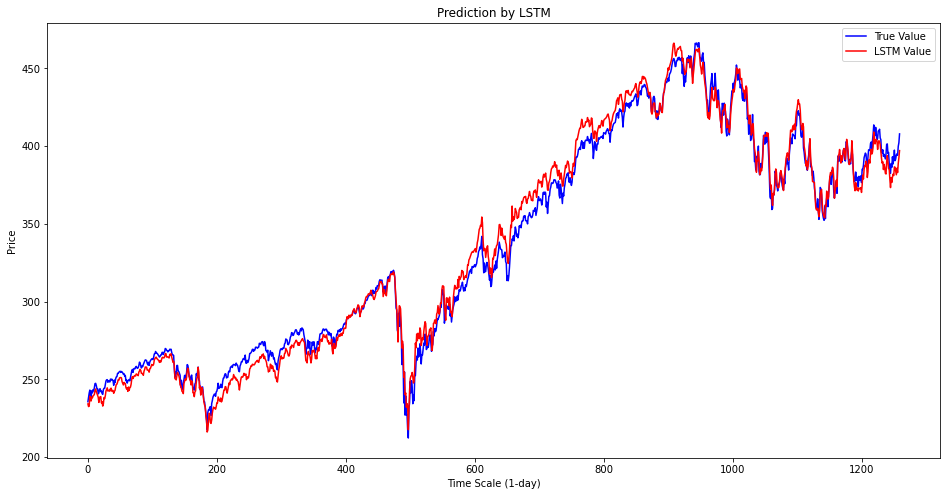

In [14]:
#Predicted vs True Adj Close Value – LSTM
plt.subplots(figsize=(16,8))
plt.plot(y_test, label='True Value', color="blue")
plt.plot(y_pred, label='LSTM Value', color="red")
plt.title('Prediction by LSTM')
plt.xlabel('Time Scale (1-day)')
plt.ylabel('Price')
plt.legend()
plt.show()

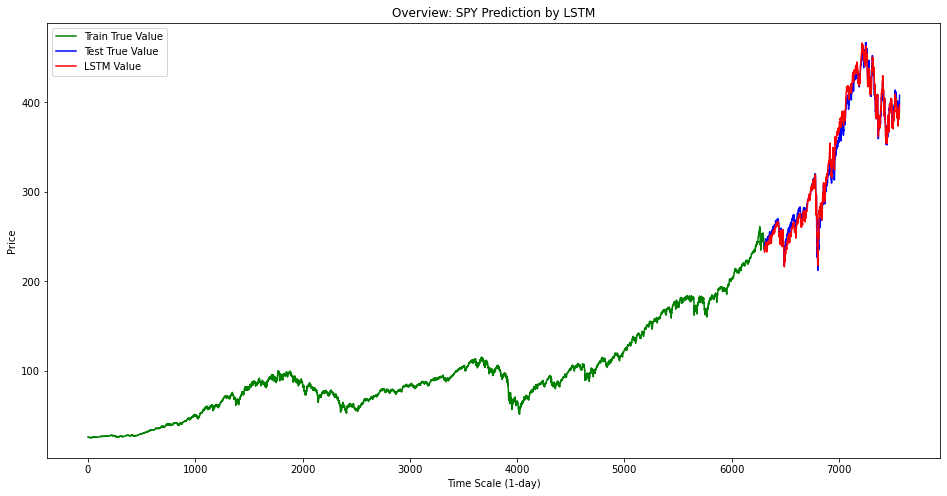

In [15]:
#Full overview of data & prediction
plt.subplots(figsize=(16,8))
plt.plot(y_train_df, label='Train True Value', color="green")
plt.plot(y_test_df, label='Test True Value', color="blue")
plt.plot(y_pred_df, label='LSTM Value', color="red")
plt.title('Overview: SPY Prediction by LSTM')
plt.xlabel('Time Scale (1-day)')
plt.ylabel('Price')
plt.legend()
plt.show()

## End. Thank you!